
Section 2: Developing Visualisations

Step 1: Download the Datasets
-  vgsales.csv (Video Game Sales Data)
-  SCGOP2016.csv (Republican Primary Election Results)
-  Use read.csv() to read the file into a dataframe
-  See end of document for dataset descriptors.


Step 2: Generate Initial Visualisations
-  Load each dataset with read.csv().
-  Create histograms and boxplots (or violin plots).
-  Overlay density plots to assess skewness.
-  If necessary, transform skewed data using log(df$column).


Step 3: Prepare and Reshape the Data
-  Use pivot_longer() on vgsales.csv to create separate rows for different sales regions.
-  Use pivot_longer() on SCGOP2016.csv to reshape candidate vote data into a long format.
-  For SCGOP2016.csv, limit analysis to the top three candidates by total votes.


Step 4: Regenerate and Compare Visualisations
-  Recreate histograms, boxplots, and violin plots with the modified data.
-  Use Cowplot to combine multiple visualisations, including density plots and bar charts.


Dataset Descriptors:
1. vgsales.csv : Video game sales data:
- Rank: The rank of the game based on global sales.
- Name: The title of the game.
- Platform: The gaming console or system the game was released on (e.g., Wii, NES, GB, PS3, X360).
- Year: The year the game was released.
- Genre: The type of game (e.g., Sports, Platform, Racing, Role-Playing, Puzzle, Simulation, Shooter, Misc, Action).
- Publisher: The company that published the game (e.g., Nintendo, Microsoft Game Studios, Take-Two Interactive).
- NA_Sales: Sales in North America (in millions of units).
- EU_Sales: Sales in Europe (in millions of units).
- JP_Sales: Sales in Japan (in millions of units).
- Other_Sales: Sales in other regions (in millions of units).
- Global_Sales: Total worldwide sales (sum of all regions, in millions of units).

2. SCGOP2016.csv. Contains county-level voting results from a Republican primary election (2016):
- County: The name of the county.
- Jeb Bush, Ben Carson, Ted Cruz, John Kasich, Marco Rubio, Donald Trump: The number of votes each candidate received in that county.
- Total: The total number of votes cast in that county.


In [8]:
if (!require("tidyverse")) install.packages("tidyverse", dependencies = TRUE)
if (!require("cowplot")) install.packages("cowplot", dependencies = TRUE)
if (!require("knitr")) install.packages("knitr", dependencies = TRUE)
if (!require("janitor")) install.packages("janitor", dependencies = TRUE)


library(tidyverse)
library(cowplot)

,County,Jeb.Bush,Ben.Carson,Ted.Cruz,John.R.Kasich,Marco.Rubio,Donald.J.Trump,Total
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Abbeville,236,305,876,157,740,1353,3667
2,Aiken,1238,2642,7138,1957,6886,9148,29009
3,Allendale,21,32,44,12,92,160,361
4,Anderson,2411,2959,8750,2038,7175,10953,34286
5,Bamberg,58,78,193,57,333,480,1199
6,Barnwell,129,171,516,91,575,1106,2588


[1] "County"         "Jeb.Bush"       "Ben.Carson"     "Ted.Cruz"      
[5] "John.R.Kasich"  "Marco.Rubio"    "Donald.J.Trump" "Total"

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


[1] "Rank"         "Name"         "Platform"     "Year"         "Genre"       
 [6] "Publisher"    "NA_Sales"     "EU_Sales"     "JP_Sales"     "Other_Sales" 
[11] "Global_Sales"

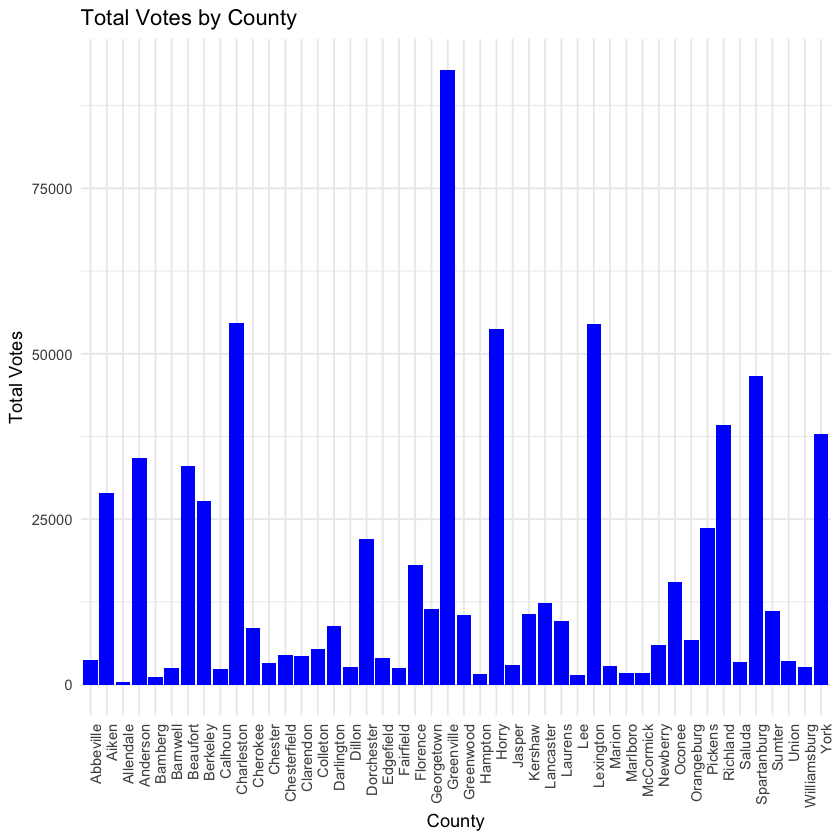

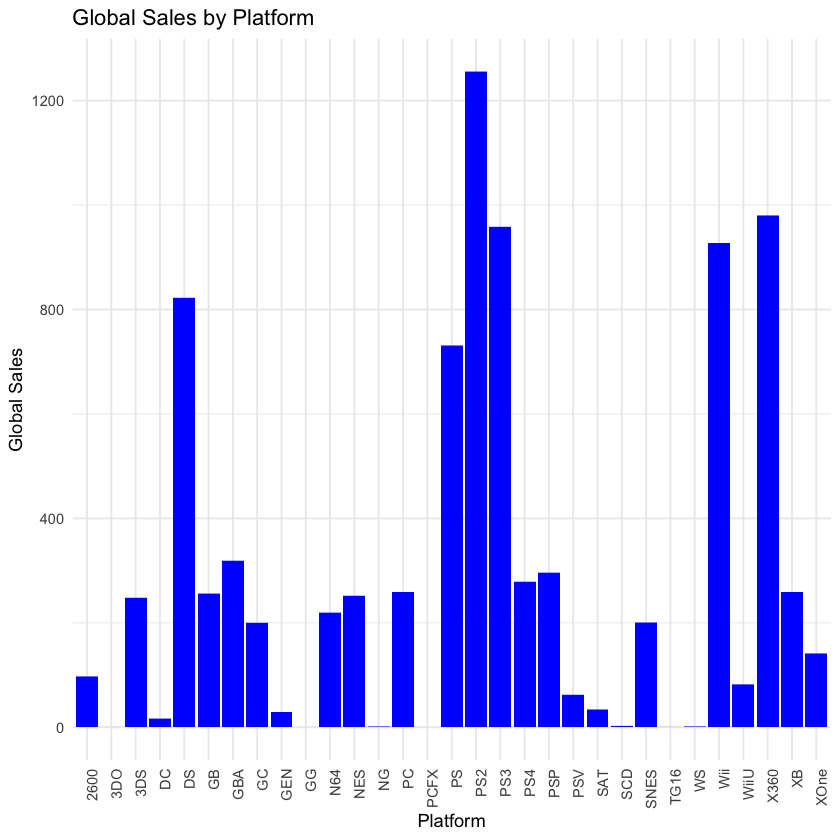

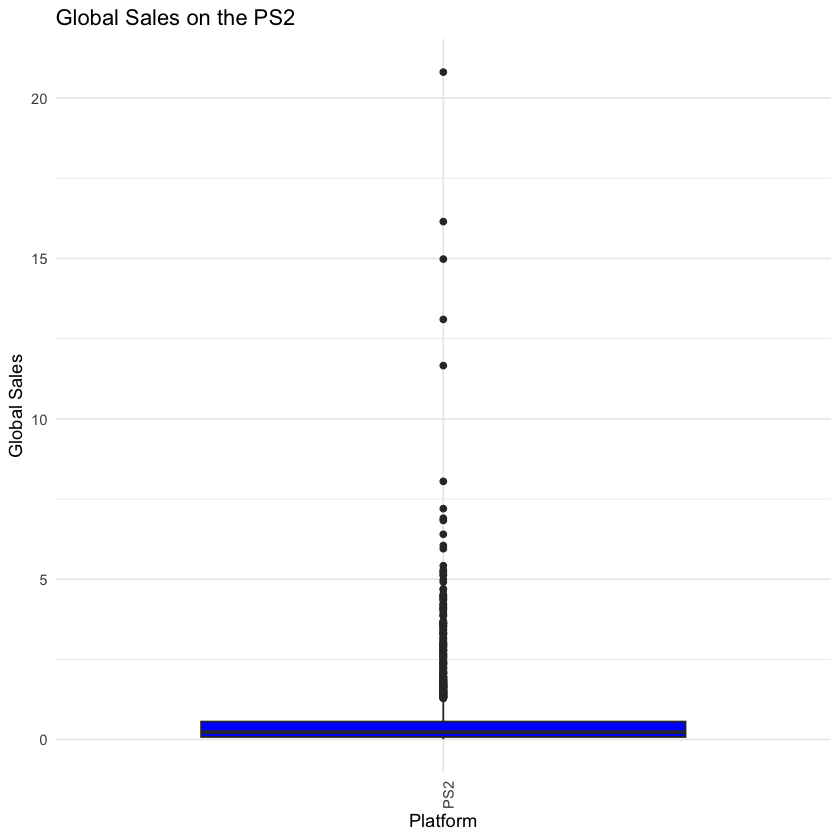

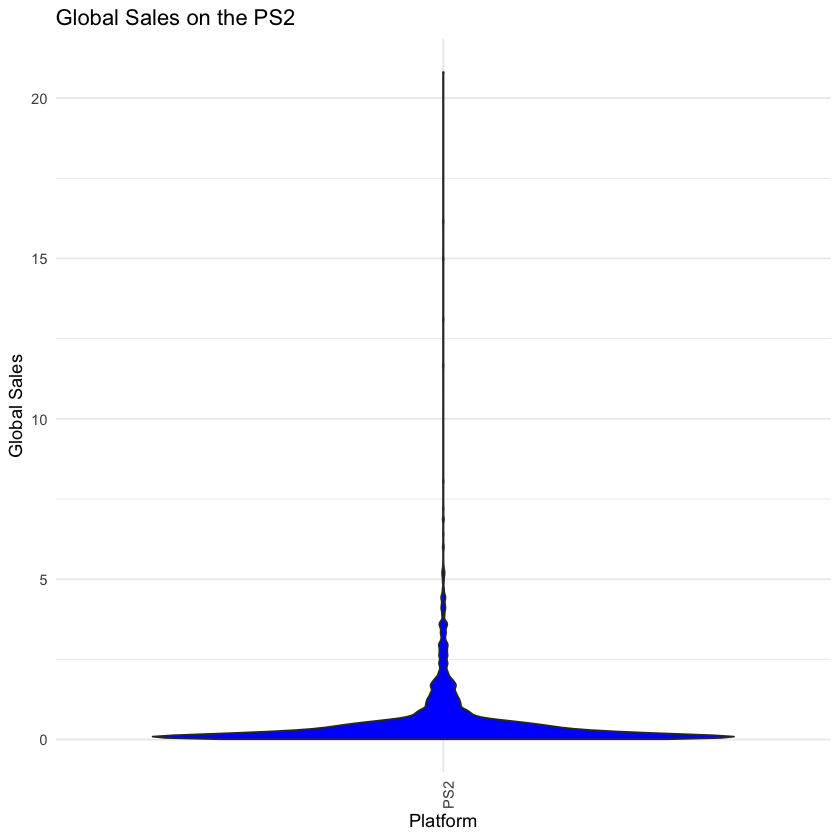

In [35]:
# Read in SCGOP2016.csv and vgsales.csv
SCGOP2016 <- read.csv("SCGOP2016.csv")

vgsales <- read.csv("vgsales.csv")

SCGOP2016 %>%
  head()

# List scgop2016 columns
colnames(SCGOP2016)


SCGOP2016 %>%
  ggplot(aes(x = County, y = Total)) +
  geom_col(fill = "blue") +  # Change from geom_bar() to geom_col()
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title = "Total Votes by County", x = "County", y = "Total Votes")

# # Box plot of Total votes by County
# SCGOP2016 %>%
#   ggplot(aes(x = County, y = Total)) +
#   geom_boxplot(fill = "blue") +
#   theme_minimal() +
#   theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
#   labs(title = "Total Votes by County", x = "County", y = "Total Votes")



vgsales %>%
  head()

# List vgsales columns
colnames(vgsales)

# Make histogram of Global Sales by Platform
vgsales %>%
  ggplot(aes(x = Platform, y = Global_Sales)) +
  geom_col(fill = "blue") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title = "Global Sales by Platform", x = "Platform", y = "Global Sales")

# Box plot of Global Sale on the PS2
vgsales %>%
  filter(Platform == "PS2") %>%
  ggplot(aes(x = Platform, y = Global_Sales)) +
  geom_boxplot(fill = "blue") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title = "Global Sales on the PS2", x = "Platform", y = "Global Sales")


# Violin plot of Global Sales on the PS2
vgsales %>%
  filter(Platform == "PS2") %>%
  ggplot(aes(x = Platform, y = Global_Sales)) +
  geom_violin(fill = "blue") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title = "Global Sales on the PS2", x = "Platform", y = "Global Sales")